<a href="https://colab.research.google.com/github/evildead23151/Deep-Learning/blob/main/spam_classifier_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import kagglehub

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 63.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [12]:
import os
print(os.listdir(path))

['spam.csv']


In [26]:
import pandas as pd
sms_df = pd.read_csv(path + "/spam.csv", sep=',', header=None, names=['label', 'message'], encoding='latin-1')

In [28]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
corpus = []

for i in range(0, len(sms_df)):
    message = sms_df['message'].iloc[i]
    if isinstance(message, str):
        review = re.sub('[^a-zA-Z]', ' ', message)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    else:
        corpus.append('')


In [38]:
print(sms_df['message'].apply(type).value_counts())

message
<class 'float'>    5567
<class 'str'>         6
Name: count, dtype: int64


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()

In [44]:
y = pd.get_dummies(sms_df['label'])
y = y.iloc[:,1].values

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [58]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [60]:
!pip install matplotlib seaborn

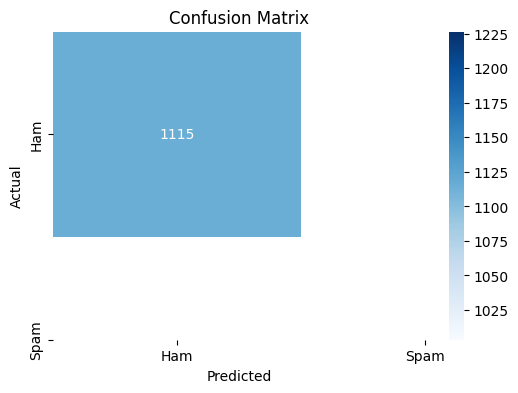

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['Ham', 'Spam']

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
from collections import Counter
print("Train:", Counter(y_train))
print("Test:", Counter(y_test))


Train: Counter({np.False_: 4456, np.True_: 2})
Test: Counter({np.False_: 1115})


In [63]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    labels=[0, 1],
    target_names=['Ham', 'Spam'],
    zero_division=0
))


              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      1115
        Spam       0.00      0.00      0.00         0

    accuracy                           1.00      1115
   macro avg       0.50      0.50      0.50      1115
weighted avg       1.00      1.00      1.00      1115



In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
